In [1]:
#ultralytics
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.5/235.7 GB disk)


In [9]:
#google drive
from google.colab import drive
drive.mount('/content/drive')

#for UTF8 error when downloading ultralytics results from colab
import locale
locale.getpreferredencoding = lambda: "UTF-8"

import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
model = ultralytics.YOLO('-')

In [ ]:
model.train(data='-', epochs=100, imgsz=640, batch=64)

In [ ]:
results = model.val(data="-")
print(results)

In [6]:
def visualize_results(test_results, result_show_limit=20):
  # Collect plotted images from results
  grid_imgs = []
  for i, result in enumerate(test_results):
      if i >= result_show_limit:
          break
      # result.plot() returns an image (NumPy array) with predictions overlaid
      img = result.plot()
      grid_imgs.append(img)

  # Determine grid dimensions (e.g., 4 columns; adjust rows accordingly)
  cols = 4
  rows = int(np.ceil(len(grid_imgs) / cols))

  # Create a figure to display the grid
  fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

  for idx, ax in enumerate(axs.flat):
      if idx < len(grid_imgs):
          # Convert BGR (if using OpenCV) to RGB if needed
          # img = cv2.cvtColor(grid_imgs[idx], cv2.COLOR_BGR2RGB)
          ax.imshow(grid_imgs[idx])
          ax.set_title(f"Result {idx+1}")
      ax.axis('off')

In [ ]:
test_results = model.predict('-')

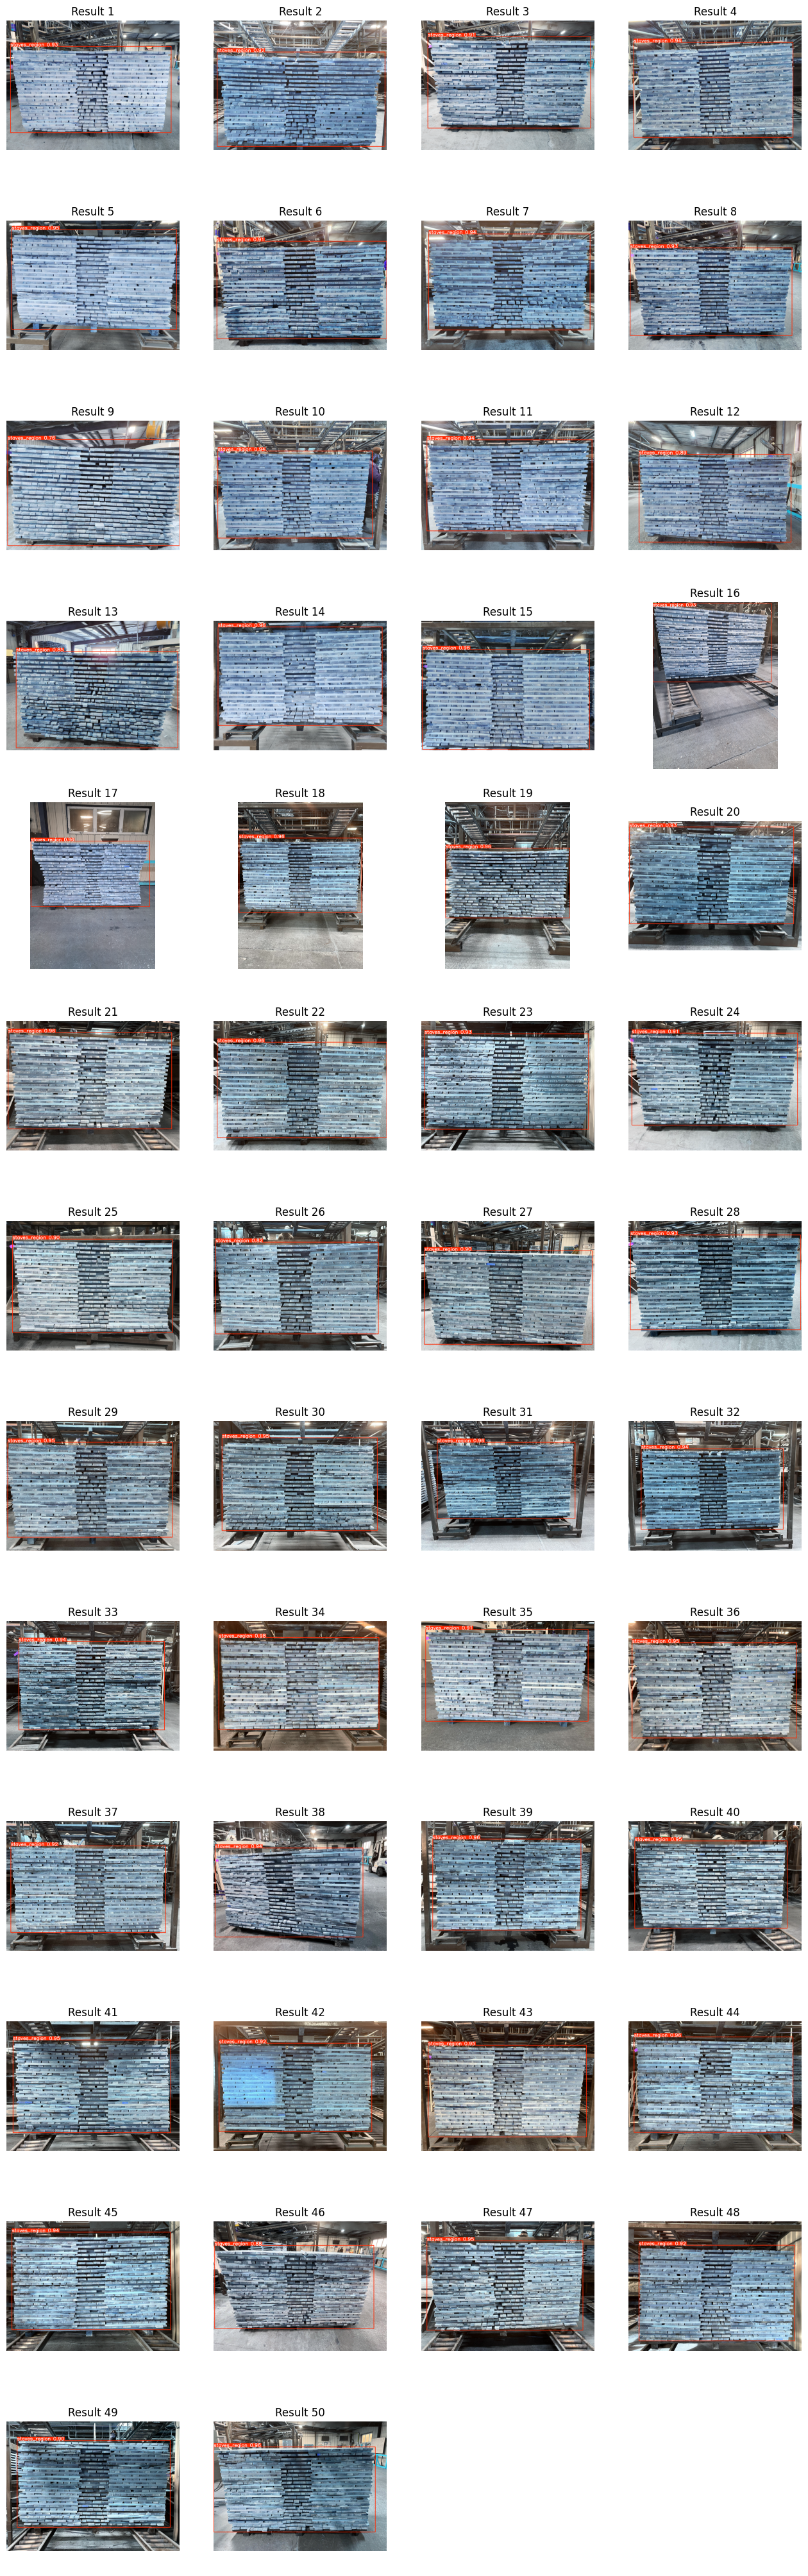

In [10]:
visualize_results(test_results, result_show_limit=50)